# Proyek Analisis Data: Bike Sharing
- **Nama:** samsul airripin
- **Email:** smasularipin@gmail.com
- **ID Dicoding:** kujou77

## Menentukan Pertanyaan Bisnis

- Pada musim apa jumlah pengguna sepeda tertinggi dan terendah terjadi?"
- Bagaimana tren penggunaan sepeda dari tahun ke tahun, dan apakah terdapat peningkatan atau penurunan signifikan antar tahun?
- Bagaimana pola penggunaan sepeda pada berbagai jam dalam sehari, dan jam berapa saja yang menunjukkan puncak penggunaan?
- Bagaimana perbandingan tingkat penyewaan sepeda antar bulan dalam satu tahun?
- Bagaimana pengaruh berbagai kondisi cuaca terhadap jumlah penyewaan sepeda, dan kondisi cuaca mana yang paling mendukung peningkatan penggunaan?
- Bagaimana perbandingan tingkat penyewaan sepeda antar hari
- Bagaimana perbandingan tingkat penyewaan sepeda antara hari kerja (working day) dan hari non-kerja (non-working day)?
- Bagaimana perbandingan pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

## Data Wrangling

### Gathering Data

In [3]:
print("A. accessing data")

bike_hour = pd.read_csv('data/hour.csv')

A. accessing data


**Insight:**
- data yang dijadikan referensi diambil dari hour.csv karena memiliki data tentang peminjaman per jam

### Assessing Data

In [4]:
print('print head')
print(bike_hour.head())

print('\nprint head')
bike_hour.info()

print("\nDescribe data")
bike_hour.describe(include="all")

print("\ncek duplicate data")
print(bike_hour.duplicated().sum())

print("\ncek null data")
bike_hour.isnull().sum()

print head
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

print head
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- tidak ada data duplicate
- tidak ada data null

### Cleaning Data

**Insight:**
- karena tidak ada data duplicate dan null data sudah siap digunakan, dan tidak ada anomali yang mengganggu, jadi proses cleaning bisa di skip

## Exploratory Data Analysis (EDA)

### Explore ...

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa jumlah pengguna sepeda tertinggi dan terendah terjadi?

In [5]:
bike_hour_by_season = bike_hour.groupby(by="season").agg({
    "cnt": "sum",
})
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
bike_hour_by_season.index = bike_hour_by_season.index.map(season_labels)
bike_hour_by_season = bike_hour_by_season.sort_values(by="cnt", ascending=False)
print(bike_hour_by_season)

max_season = bike_hour_by_season["cnt"].idxmax()
min_season = bike_hour_by_season["cnt"].idxmin()
print(f"Musim dengan jumlah pengguna tertinggi: {max_season}")
print(f"Musim dengan jumlah pengguna terendah: {min_season}")

            cnt
season         
Fall    1061129
Summer   918589
Winter   841613
Spring   471348
Musim dengan jumlah pengguna tertinggi: Fall
Musim dengan jumlah pengguna terendah: Spring


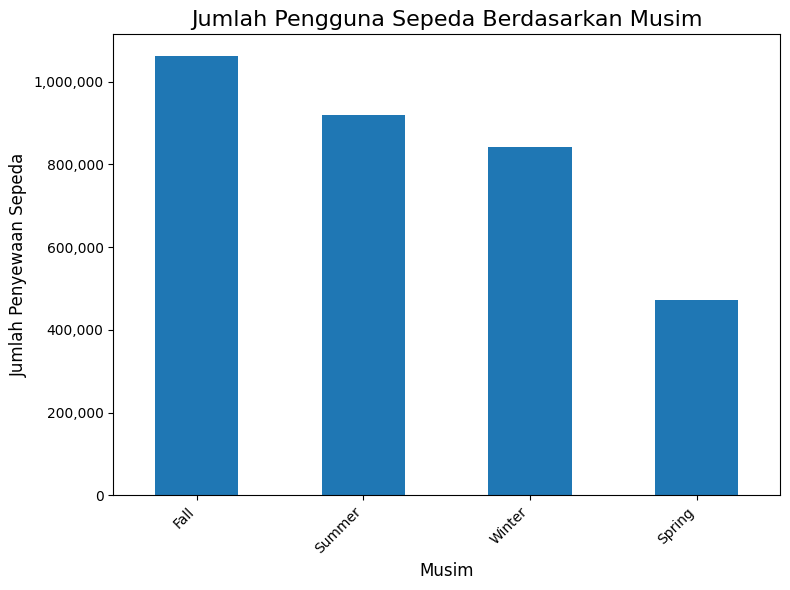

In [6]:
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')  # Menambahkan koma s
plt.figure(figsize=(8,6))
bike_hour_by_season['cnt'].plot(kind='bar')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')  # Label diagonal dengan perataan kanan
plt.title('Jumlah Pengguna Sepeda Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.tight_layout()
plt.show()

**Insight:**
- data peminjaman tertinggi ada di musim panas ( Fall ) dan terendah ada di munsim semi ( Spring )

### Pertanyaan 2: Bagaimana tren penggunaan sepeda dari tahun ke tahun, dan apakah terdapat peningkatan atau penurunan signifikan antar tahun?

In [ ]:
bike_hour_by_year = bike_hour.groupby(by="yr").agg({
    "cnt": "sum"
})
year_label = {0: "2011", 1: "2012"}
bike_hour_by_year.index = bike_hour_by_year.index.map(year_label)
print(bike_hour_by_year)

# Menghitung perubahan jumlah penyewaan
change = bike_hour_by_year["cnt"].pct_change().iloc[1] * 100
if change > 0:
    print(f"Terdapat peningkatan jumlah pengguna sepeda sebesar {change:.2f}% dari 2011 ke 2012.")
else:
    print(f"Terdapat penurunan jumlah pengguna sepeda sebesar {-change:.2f}% dari 2011 ke 2012.")

          cnt
yr           
2011  1243103
2012  2049576
Terdapat peningkatan jumlah pengguna sepeda sebesar 64.88% dari 2011 ke 2012.


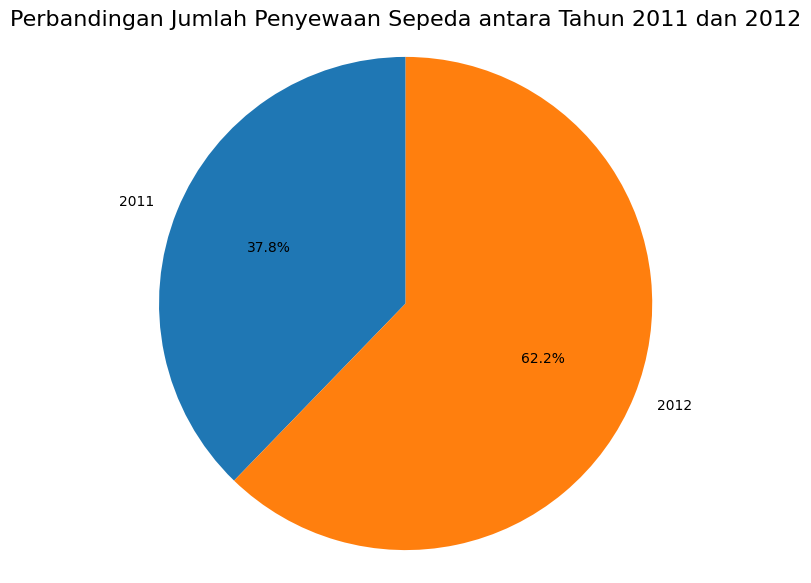

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(bike_hour_by_year['cnt'], labels=bike_hour_by_year.index, autopct='%1.1f%%', startangle=90)
plt.title('Perbandingan Jumlah Penyewaan Sepeda antara Tahun 2011 dan 2012', fontsize=16)
plt.axis('equal')
plt.show()

**Insight:**
- Terdapat peningkatan jumlah pengguna sepeda sebesar 64.88% dari 2011 ke 2012.


### Pertanyaan 3: Bagaimana perbandingan tingkat penyewaan sepeda antar bulan dalam tahun 2012 ?

Jumlah pengguna sepeda per bulan di tahun 2012:
         mnth     cnt
0     January   96744
1    February  103137
2       March  164875
3       April  174224
4         May  195865
5        June  202830
6        July  203607
7      August  214503
8   September  218573
9     October  198841
10   November  152664
11   December  123713


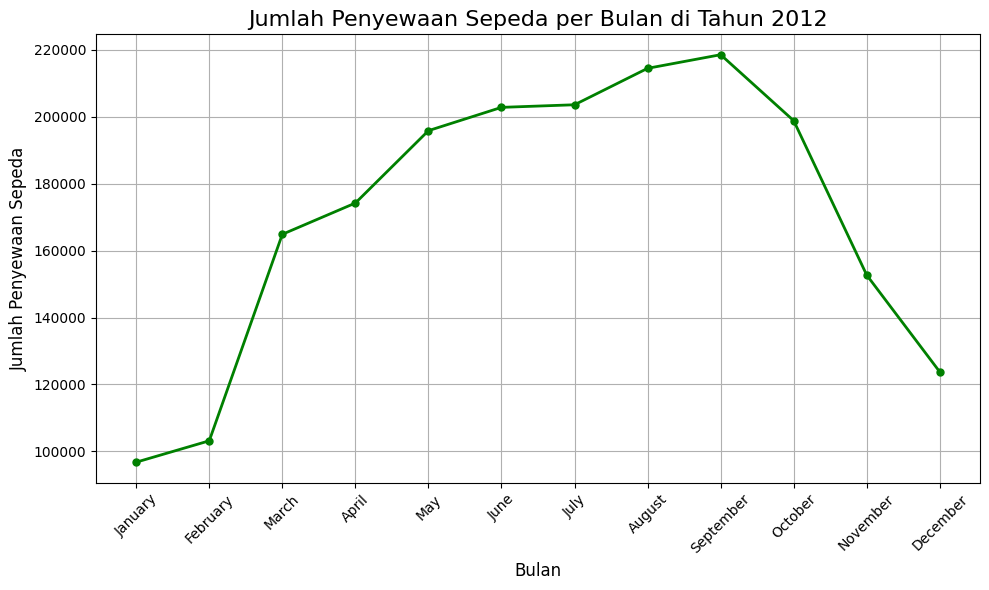

In [ ]:
# Memfilter data hanya untuk tahun 2012 (yr == 1)
bike_hour_2012 = bike_hour[bike_hour["yr"] == 1]
bike_hour_by_month_2012 = bike_hour_2012.groupby(by="mnth").agg({
    "cnt": "sum"
}).reset_index()

month_labels = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
bike_hour_by_month_2012["mnth"] = bike_hour_by_month_2012["mnth"].map(month_labels)
print("Jumlah pengguna sepeda per bulan di tahun 2012:")
print(bike_hour_by_month_2012)

# Membuat line chart
plt.figure(figsize=(10,6))
plt.plot(bike_hour_by_month_2012["mnth"], bike_hour_by_month_2012["cnt"], marker='o', color='g', linestyle='-', linewidth=2, markersize=5)
plt.title('Jumlah Penyewaan Sepeda per Bulan di Tahun 2012', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  # Menambahkan rotasi untuk label bulan agar mudah dibaca
plt.tight_layout()
plt.show()

**Insight:**
- pada tahun 2012 berdasarkan bulan jumlah peminjaman tertinggi berada di bulan september dan terendah ada di bulan januari

### Pertanyaan 4: Bagaimana pengaruh berbagai kondisi cuaca terhadap jumlah penyewaan sepeda, dan kondisi cuaca mana yang paling mendukung peningkatan penggunaan?

Korelasi antara kondisi cuaca (weathersit) dan jumlah penyewaan sepeda (cnt): -0.14

Rata-rata penyewaan sepeda berdasarkan kondisi cuaca:
            weathersit         cnt
0  Clear/Partly Cloudy  204.869272
1          Mist/Cloudy  175.165493
2      Light Rain/Snow  111.579281
3      Heavy Rain/Snow   74.333333


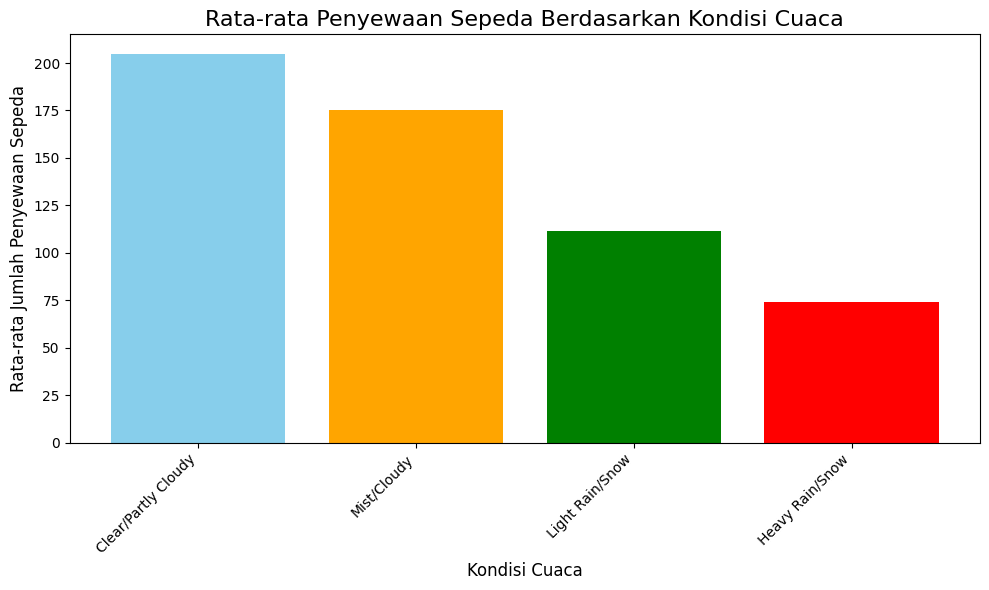

In [ ]:
correlation = bike_hour["weathersit"].corr(bike_hour["cnt"])
print(f"Korelasi antara kondisi cuaca (weathersit) dan jumlah penyewaan sepeda (cnt): {correlation:.2f}")

# Menghitung rata-rata penyewaan sepeda berdasarkan kondisi cuaca
avg_rentals_by_weather = bike_hour.groupby("weathersit").agg({
    "cnt": "mean"
}).reset_index()

# Memberi label pada kategori kondisi cuaca
weather_labels = {
    1: "Clear/Partly Cloudy",
    2: "Mist/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
}

avg_rentals_by_weather["weathersit"] = avg_rentals_by_weather["weathersit"].map(weather_labels)

print("\nRata-rata penyewaan sepeda berdasarkan kondisi cuaca:")
print(avg_rentals_by_weather)
plt.figure(figsize=(10,6))
plt.bar(avg_rentals_by_weather["weathersit"], avg_rentals_by_weather["cnt"], color=['skyblue', 'orange', 'green', 'red'])

plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- jumlah peminjaman terbanyak terjadi pada cuaca cerah dan jumlah peminjaman terkecil pada cuaca hujan/berawan

### Pertanyaan 6: Bagaimana perbandingan tingkat penyewaan sepeda antara hari kerja (working day) dan hari non-kerja (non-working day)?

### Pertanyaan 5: Bagaimana perbandingan tingkat penyewaan sepeda antar hari


            cnt
weekday        
Minggu   444027
Senin    455503
Selasa   469109
Rabu     473048
Kamis    485395
Jumat    487790
Sabtu    477807


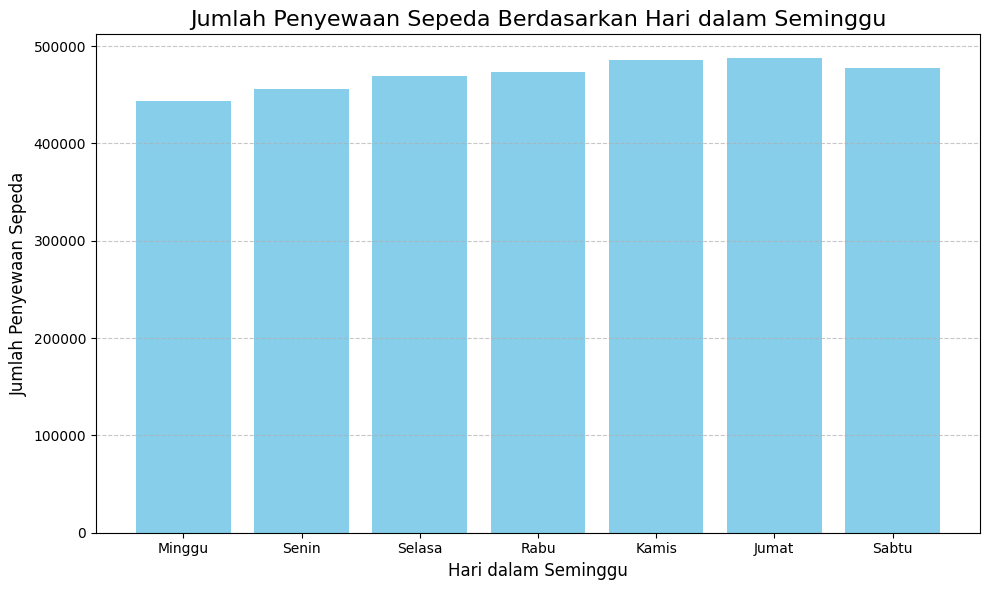

In [ ]:
bike_hour_by_day = bike_hour.groupby('weekday').agg({
    'cnt': 'sum'
})

# Menambahkan label hari untuk memudahkan interpretasi (0: Minggu, 1: Senin, ..., 6: Sabtu)
day_labels = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
bike_hour_by_day.index = bike_hour_by_day.index.map(day_labels)
print(bike_hour_by_day)
plt.figure(figsize=(10,6))
plt.bar(bike_hour_by_day.index, bike_hour_by_day['cnt'], color='skyblue')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari dalam Seminggu', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- jumlah peminjaman jika di total untuk setiap harinya relative sama, dan yan tertinggi ada pada hari jumat

                    cnt
workingday             
Non-Hari Kerja  1000269
Hari Kerja      2292410


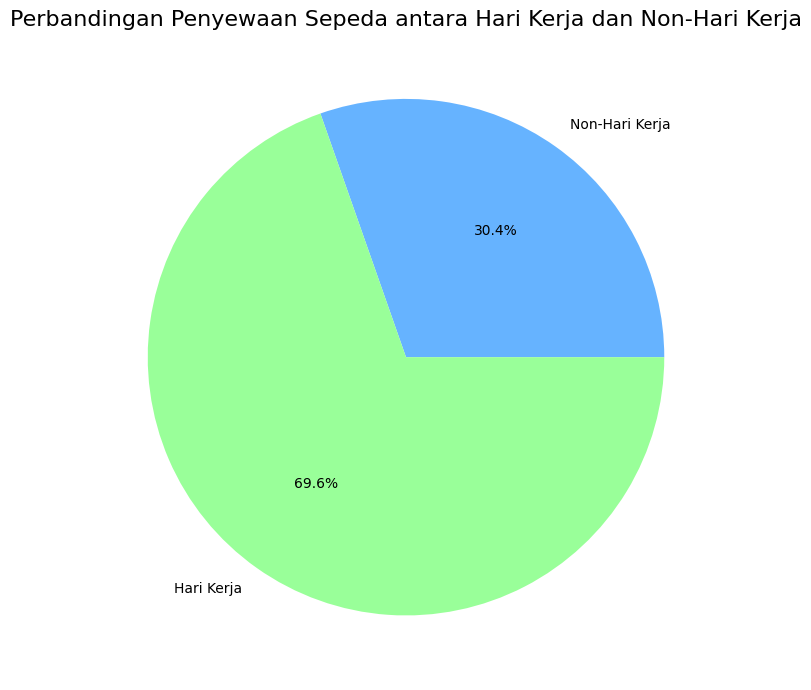

In [ ]:
bike_hour_by_workingday = bike_hour.groupby('workingday').agg({
    'cnt': 'sum'
})

# Menambahkan label untuk lebih mudah memahami (1: Hari Kerja, 0: Non-Hari Kerja)
workingday_labels = {0: 'Non-Hari Kerja', 1: 'Hari Kerja'}
bike_hour_by_workingday.index = bike_hour_by_workingday.index.map(workingday_labels)
print(bike_hour_by_workingday)

# Membuat grafik pie chart
plt.figure(figsize=(7, 7))
plt.pie(bike_hour_by_workingday['cnt'], labels=bike_hour_by_workingday.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title('Perbandingan Penyewaan Sepeda antara Hari Kerja dan Non-Hari Kerja', fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**
- jumlah peminjaman pada hari kerja lebih tinggi dari non hari kerja

### Pertanyaan 7: Bagaimana perbandingan pola penggunaan sepeda antara pengguna kasual dan pengguna terdaftar?

            User_Type  Total_Rentals
0     Pengguna Kasual         620017
1  Pengguna Terdaftar        2672662


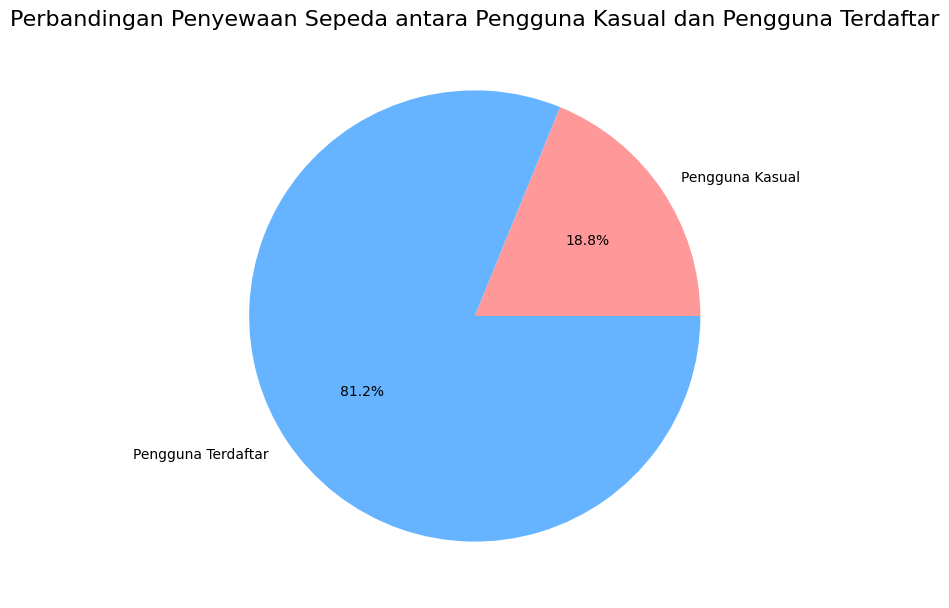

In [ ]:
# Menghitung jumlah penyewaan sepeda untuk pengguna kasual dan terdaftar
bike_hour_by_user_type = bike_hour[['casual', 'registered', 'cnt']].agg({
    'casual': 'sum',     # Total penyewaan oleh pengguna kasual
    'registered': 'sum'  # Total penyewaan oleh pengguna terdaftar
})


bike_hour_by_user_type = bike_hour_by_user_type.reset_index()
bike_hour_by_user_type.columns = ['User_Type', 'Total_Rentals']

bike_hour_by_user_type['User_Type'] = bike_hour_by_user_type['User_Type'].map({
    'casual': 'Pengguna Kasual',
    'registered': 'Pengguna Terdaftar'
})
print(bike_hour_by_user_type)


plt.figure(figsize=(7, 7))
plt.pie(bike_hour_by_user_type['Total_Rentals'], labels=bike_hour_by_user_type['User_Type'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Perbandingan Penyewaan Sepeda antara Pengguna Kasual dan Pengguna Terdaftar', fontsize=16)
plt.tight_layout()
plt.show()

**Insight:**
- jumlah peminjaman oleh pengguna terdaftar lebih banyak dari pengguna kasual

### Pertanyaan 8: Bagaimana pola penggunaan sepeda pada berbagai jam dalam sehari, dan jam berapa saja yang menunjukkan puncak penggunaan?

       cnt
hr        
0    39130
1    24164
2    16352
3     8174
4     4428
5    14261
6    55132
7   154171
8   261001
9   159438
10  126257
11  151320
12  184414
13  184919
14  175652
15  183149
16  227748
17  336860
18  309772
19  226789
20  164550
21  125445
22   95612
23   63941
Jam dengan jumlah pengguna tertinggi: 17:00
Jam dengan jumlah pengguna terendah: 4:00


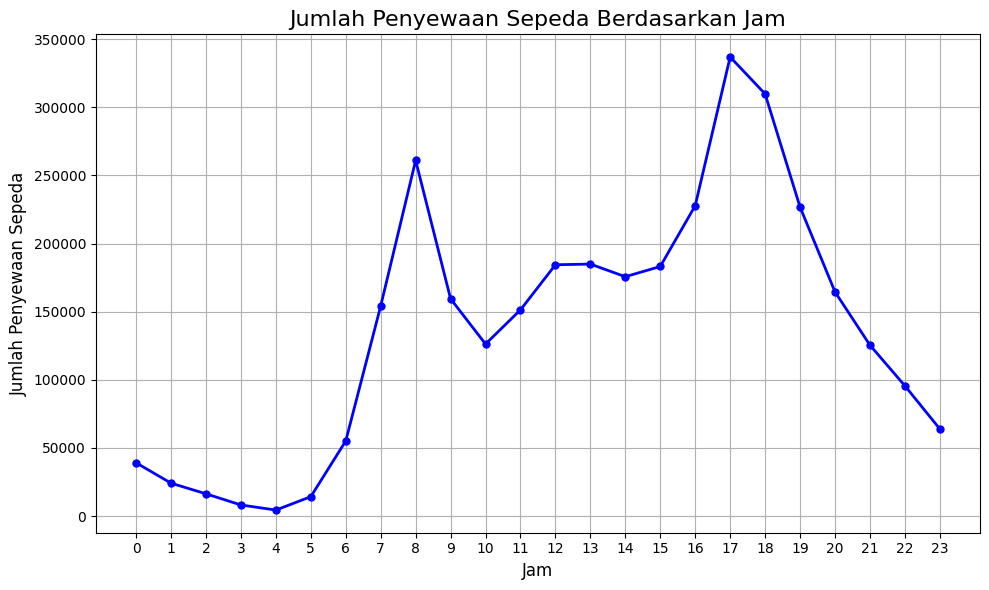

In [ ]:
bike_hour_by_hour = bike_hour.groupby(by="hr").agg({
    "cnt": "sum"
})
print(bike_hour_by_hour)

# Menentukan jam puncak dan terendah
peak_hour = bike_hour_by_hour["cnt"].idxmax()
low_hour = bike_hour_by_hour["cnt"].idxmin()
print(f"Jam dengan jumlah pengguna tertinggi: {peak_hour}:00")
print(f"Jam dengan jumlah pengguna terendah: {low_hour}:00")

plt.figure(figsize=(10,6))
plt.plot(bike_hour_by_hour.index, bike_hour_by_hour['cnt'], marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- berdasarkan jam, total jumlah peminjaman tertinggi berada pada jam 17 dan terendah pada jam 4  

## Analisis Lanjutan (Opsional)
**Clustering Berdasarkan Waktu**

- mengelompokkannya menjadi kategori tertentu, misalnya:

  + Pagi: Jam 6–11.
  + Siang: Jam 12–17.
  + Sore/Malam: Jam 18–23.
  + Dini Hari: Jam 0–5.

  time_cluster      cnt
0    Dini Hari   106509
1         Pagi   907319
2        Siang  1292742
3   Sore/Malam   986109


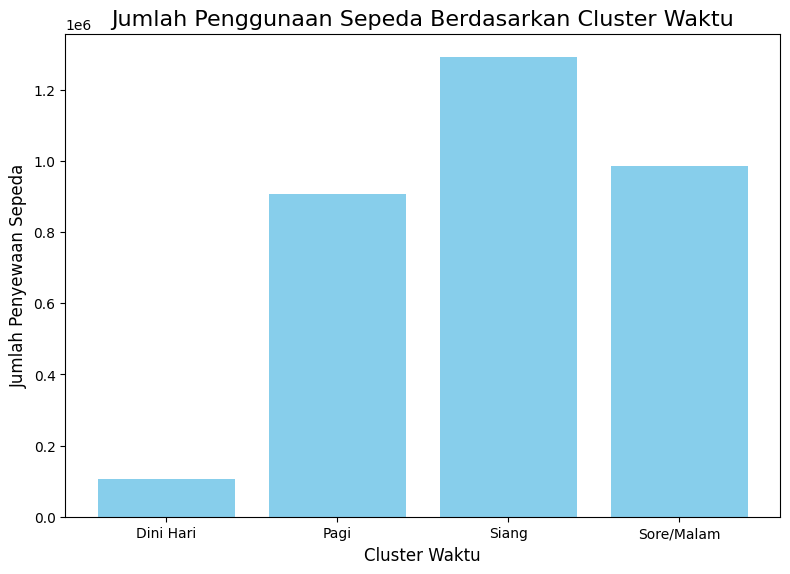

In [ ]:
def time_based_cluster(hour):
    if 6 <= hour <= 11:
        return 'Pagi'
    elif 12 <= hour <= 17:
        return 'Siang'
    elif 18 <= hour <= 23:
        return 'Sore/Malam'
    else:
        return 'Dini Hari'


bike_hour['time_cluster'] = bike_hour['hr'].apply(time_based_cluster)


bike_hour_by_time_cluster = bike_hour.groupby('time_cluster').agg({
    'cnt': 'sum'
}).reset_index()


time_order = ['Dini Hari', 'Pagi', 'Siang', 'Sore/Malam']
bike_hour_by_time_cluster['time_cluster'] = pd.Categorical(
    bike_hour_by_time_cluster['time_cluster'], categories=time_order, ordered=True
)
bike_hour_by_time_cluster = bike_hour_by_time_cluster.sort_values('time_cluster')

print(bike_hour_by_time_cluster)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(bike_hour_by_time_cluster['time_cluster'], bike_hour_by_time_cluster['cnt'], color='skyblue')
plt.title('Jumlah Penggunaan Sepeda Berdasarkan Cluster Waktu', fontsize=16)
plt.xlabel('Cluster Waktu', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
- berdasarkan clustiering 4 waktu peminjaman terbanyak terjadi di siang hari dan paling sedikit di dini hari

## Conclusion

- data peminjaman tertinggi ada di musim panas ( Fall ) dan terendah ada di munsim semi ( Spring )
- Terdapat peningkatan jumlah pengguna sepeda sebesar 64.88% dari 2011 ke 2012.
- pada tahun 2012 berdasarkan bulan jumlah peminjaman tertinggi berada di bulan september dan terendah ada di bulan januari
- jumlah peminjaman terbanyak terjadi pada cuaca cerah dan jumlah peminjaman terkecil pada cuaca hujan/berawan
- jumlah peminjaman jika di total untuk setiap harinya relative sama, dan yan tertinggi ada pada hari jumat
- jumlah peminjaman pada hari kerja lebih tinggi dari non hari kerja
- jumlah peminjaman oleh pengguna terdaftar lebih banyak dari pengguna kasual
- berdasarkan jam, total jumlah peminjaman tertinggi berada pada jam 17 dan terendah pada jam 4